In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
# path = '/mnt/home/polymathic/ceph/the_well/testing_before_adding/clawpack_data/euler2d_quadrants_gamma1.13_C3H8_16.0_extrap/seed1/output_numpy/data.hdf5'
boundaries = {'extrap': 100, 'periodic': 1000}
gases = {
    1.13: 'C3H8_16.0',
    # 1.195: 'CO2_1000.0',
    1.22: 'C2H6_15.0',
    # 1.235: 'CO2_400.0',
    # 1.281: 'CO2_100.0',
    1.3: 'CO2_20.0',
    # 1.31: 'H2O_200.0/CO2_0.0/N2O_20.0/NH3_15.0/SO2_15.0',
    # 1.318: 'H2_2000.0',
    # 1.32: 'CH4_20.0',
    # 1.324: 'H2O_100.0',
    1.33: 'H2O_20.0',
    # 1.34: 'Cl2_20.0',
    # 1.35: 'CH4_-74.0',
    # 1.358: 'H2_1000.0',
    1.365: 'Dry_air_1000.0',
    # 1.387: 'H2_400.0',
    # 1.393: 'Dry air_400.0',
    # 1.397: 'O2_200.0',
    # 1.398: 'Dry air_200.0',
    # 1.399: 'O2_100.0',
    1.4: 'Dry_air_20.0',
    # 1.403: 'Dry air_0.0',
    1.404: 'H2_100.0_Dry_air_-15.0',
    # 1.41: 'CH4_-115.0',
    # 1.415: 'O2_-76.0',
    # 1.45: 'O2_-181.0',
    1.453: 'H2_-76.0',
    # 1.47: 'N2_-181.0',
    1.597: 'H2_-181.0',
    # 1.64: 'Ne_19.0/Xe_19.0',
    # 1.66: 'He_20.0',
    # 1.67: 'Ar_20.0/Hg_360.0',
    # 1.68: 'Kr_19.0',
    1.76: 'Ar_-180.0'
}

gas name: Dry_air_20.0
boundary condition: periodic
random seed number: 383
time: 59


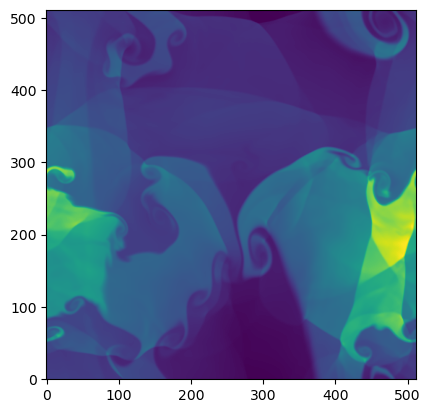

In [2]:
gas_index = 5 #np.random.randint(0, len(gases))
bc_random = 1 #np.random.randint(0, 2)
bc = list(boundaries.keys())[bc_random]
gas_name = gases[list(gases.keys())[gas_index]]
gas_value = list(gases.keys())[gas_index]
file_suffix = f'gamma{gas_value}_{gas_name}_{bc}.hdf5'
path = 'data/' + file_suffix

i = np.random.randint(0, 500)

with h5py.File(path, 'r') as file:
    energy = file['energy'][i]
    momentum_x = file['momentum_x'][i]
    momentum_y = file['momentum_y'][i]
    density = file['density'][i]
    pressure = file['pressure'][i]

print('gas name:', gas_name)
print('boundary condition:', bc)
print('random seed number:' , i)
t = np.random.randint(0, 100)
print('time:', t)
plt.imshow(density[t], origin='lower');

In [4]:
#Create the Gif
import sys
import os
sys.path.append(os.path.abspath('../..'))
from utils import create_gif

create_gif(density, saving_directory='/mnt/home/polymathic/ceph/the_well/2D/euler_quadrants', name_file='density', delete_imgs=False)

In [ ]:
#create a gif from saved pngs:
import os
import imageio
import glob
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


dens_min = density.min()
dens_max = density.max()
#save each image as png:
for i in range(density.shape[0]):
    plt.imshow( density[i], origin='lower', vmin=dens_min, vmax=dens_max);
    plt.axis('off')
    plt.savefig(f'imgs_for_gif/density_normalized_{gas_index}_{i}.png', bbox_inches='tight', pad_inches=0)
    plt.close()
# Create a gif from the saved pngs
png_dir = 'imgs_for_gif/'
images = []
for file_name in sorted(glob.glob(png_dir + '*.png'), key=lambda x: int(re.findall(r'\d+', x)[1])):
    images.append(imageio.imread(file_name))
imageio.mimsave(f'density_normalized_{gas_index}.gif', images, duration=0.1)